In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ML/

/content/drive/MyDrive/ML


In [24]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

import pandas as pd

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

In [25]:
data_dir = '/content/drive/MyDrive/ML/traffic_sign_dataset'
train_path = '/content/drive/MyDrive/ML/traffic_sign_dataset/Train'
test_path = '/content/drive/MyDrive/ML/traffic_sign_dataset/Test'


In [28]:
image_data = []
image_labels = []
total_classes = 43
height = 64
width = 64
channels = 3
input_path = data_dir

for i in range(total_classes):
    path = input_path + '/Train/' + str(i)
    print(path)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error - Image loading")

image_data = np.array(image_data)
image_labels = np.array(image_labels)

/content/drive/MyDrive/ML/traffic_sign_dataset/Train/0
/content/drive/MyDrive/ML/traffic_sign_dataset/Train/1
/content/drive/MyDrive/ML/traffic_sign_dataset/Train/2
/content/drive/MyDrive/ML/traffic_sign_dataset/Train/3
/content/drive/MyDrive/ML/traffic_sign_dataset/Train/4
/content/drive/MyDrive/ML/traffic_sign_dataset/Train/5
/content/drive/MyDrive/ML/traffic_sign_dataset/Train/6
/content/drive/MyDrive/ML/traffic_sign_dataset/Train/7
/content/drive/MyDrive/ML/traffic_sign_dataset/Train/8
/content/drive/MyDrive/ML/traffic_sign_dataset/Train/9
/content/drive/MyDrive/ML/traffic_sign_dataset/Train/10
/content/drive/MyDrive/ML/traffic_sign_dataset/Train/11
/content/drive/MyDrive/ML/traffic_sign_dataset/Train/12
/content/drive/MyDrive/ML/traffic_sign_dataset/Train/13
/content/drive/MyDrive/ML/traffic_sign_dataset/Train/14
/content/drive/MyDrive/ML/traffic_sign_dataset/Train/15
/content/drive/MyDrive/ML/traffic_sign_dataset/Train/16
/content/drive/MyDrive/ML/traffic_sign_dataset/Train/17
/c

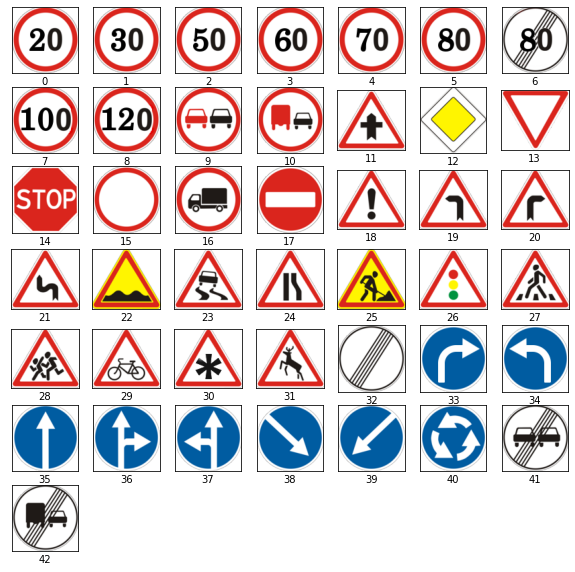

In [30]:
dir = data_dir
    
plt.figure(figsize=(10, 10))
for i in range (0,43):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    path = dir + "/meta/{0}.png".format(i)
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(i)

In [31]:
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

In [32]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_valid = X_valid/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (18036, 64, 64, 3)
X_valid.shape (4510, 64, 64, 3)
y_train.shape (18036,)
y_valid.shape (4510,)


In [34]:
y_train = keras.utils.to_categorical(y_train, total_classes)
y_valid = keras.utils.to_categorical(y_valid, total_classes)

print(y_train.shape)
print(y_valid.shape)

(18036, 43)
(4510, 43)


In [35]:
vgg16 = VGG16(input_shape=(64,64,3), weights='imagenet', include_top=False)


58889256/58889256 [==============================] - 0s 0us/step


In [36]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [37]:
add_model = Sequential()
add_model.add(Flatten(input_shape=vgg16.output_shape[1:]))

add_model.add(Dense(1024, activation='relu'))



add_model.add(Dense(y_train.shape[1], activation='softmax'))

model = Model(inputs=vgg16.input, outputs=add_model(vgg16.output))
learning_rate = 0.0001
def results(model):
  adam = Adam(lr=learning_rate)
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [38]:
epochs = 10
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_valid, y_valid))

Epoch 1/10
282/282 [==============================] - 20s 44ms/step - loss: 0.8694 - accuracy: 0.7255 - val_loss: 0.4923 - val_accuracy: 0.8452
Epoch 2/10
282/282 [==============================] - 11s 38ms/step - loss: 0.3636 - accuracy: 0.8873 - val_loss: 0.3583 - val_accuracy: 0.8869
Epoch 3/10
282/282 [==============================] - 11s 38ms/step - loss: 0.2359 - accuracy: 0.9261 - val_loss: 0.4143 - val_accuracy: 0.8583
Epoch 4/10
282/282 [==============================] - 11s 38ms/step - loss: 0.1520 - accuracy: 0.9560 - val_loss: 0.1947 - val_accuracy: 0.9381
Epoch 5/10
282/282 [==============================] - 11s 38ms/step - loss: 0.1123 - accuracy: 0.9662 - val_loss: 0.1993 - val_accuracy: 0.9404
Epoch 6/10
282/282 [==============================] - 11s 38ms/step - loss: 0.0868 - accuracy: 0.9752 - val_loss: 0.1414 - val_accuracy: 0.9541
Epoch 7/10
282/282 [==============================] - 11s 38ms/step - loss: 0.0758 - accuracy: 0.9772 - val_loss: 0.1767 - val_accuracy:

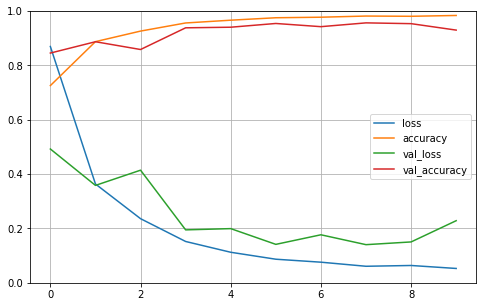

In [39]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [40]:
from sklearn.metrics import accuracy_score

test = pd.read_csv(input_path + '/Test.csv')

labels = test["ClassId"].values
test_imgs = test["Path"].values

In [41]:
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((height,width))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [43]:
!rm /content/drive/MyDrive/ML/traffic_sign_dataset/Test/GT-final_test.csv

In [44]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [45]:
test = pd.read_csv(data_dir +'/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
y_pred = add_model.predict(test_images);
y_classes = y_pred.argmax(axis=-1)
y_classes

In [ ]:
accuracy_score(y_test, y_pred)